### Train Iris Dataset using MLFlow

In [1]:
import seaborn as sns

In [2]:
# import iris dataset
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Create a graph

<Axes: xlabel='sepal_length', ylabel='Count'>

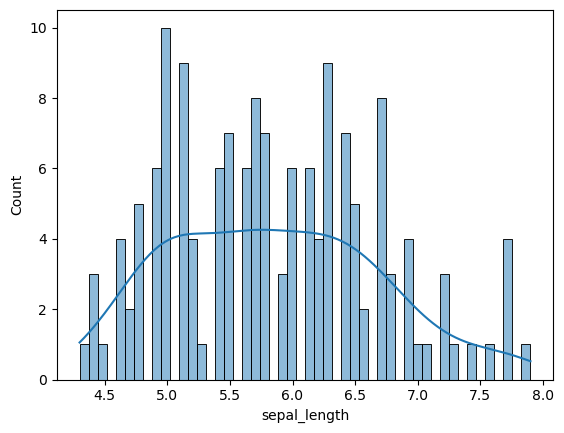

In [3]:
sns.histplot(iris["sepal_length"], kde=True, bins = 50)

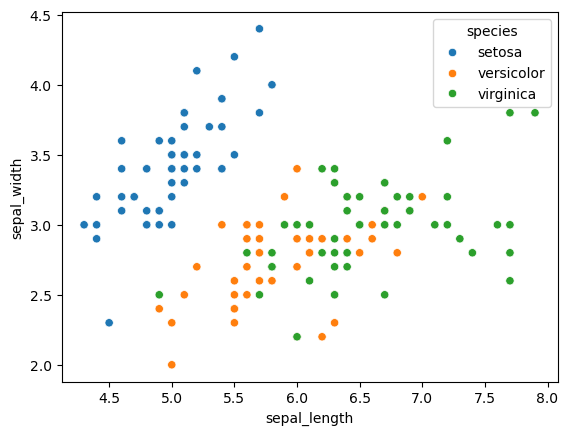

In [20]:
import matplotlib.pyplot as plt

PLOT_PATH = "iris_scatterplot.png"


sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.savefig(PLOT_PATH,dpi=300)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

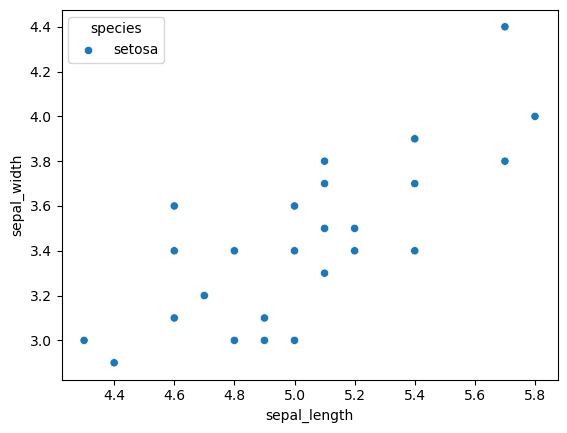

In [7]:
test_iris_df = iris[:30]

sns.scatterplot(data=test_iris_df, x="sepal_length", y="sepal_width", hue="species")

#### Train the Model

In [8]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X = iris.drop(columns=["species"])
y = iris["species"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=42)


In [9]:
len(X_train)

120

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [16]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### Register in MLFlow

In [18]:
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("iris_experiment")

2025/06/17 15:32:50 INFO mlflow.tracking.fluent: Experiment with name 'iris_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/465667172597232928', creation_time=1750167170343, experiment_id='465667172597232928', last_update_time=1750167170343, lifecycle_stage='active', name='iris_experiment', tags={}>

In [23]:
with mlflow.start_run():
    mlflow.log_artifact(PLOT_PATH)
    mlflow.log_param("test_size", TEST_SIZE)
    mlflow.log_param("model_type", "DecisionTreeClassifier")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "model")

2025/06/17 15:39:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run bald-frog-42 at: http://localhost:5000/#/experiments/465667172597232928/runs/98253492e5ca4e9da35f9b272e30d9b6
🧪 View experiment at: http://localhost:5000/#/experiments/465667172597232928
